# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import pretty print
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

670ef908620cfdeabc155344e29dd4e6


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [77]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
# set up a dictionary to store all query parameters
params = {
    "q": "",
    "appid": api_key,
    "units": "imperial"
}

# city number
city_num = 0
# empty dataframe to store city info
city_df = pd.DataFrame()
# write the line
city_dict = {
    "City" : [],
    "Cloudiness" : [],
    "Country" : [],
    "Date" : [],
    "Humidity" : [],
    "Lat" : [],
    "Lng" : [],
    "Max Temp" : [],
    "Wind Speed" : []
}
    
# start printing log
print("Beginning Data Retrieval")   
print("-" * 32)
    
# loop through each city
for city in cities:
    params["q"] = city
    response = requests.get(url, params = params)
    
    # convert the response to json
    response_json = response.json()
    #pprint(response_json)

    # count city number
    city_num += 1
    
    # get city info
    try:
        cloudiness = response_json['clouds']['all']
        country = response_json['sys']['country']
        date = response_json['dt']
        humidity = response_json['main']['humidity']
        lat = response_json['coord']['lat']
        lng = response_json['coord']['lon']
        max_temp = response_json['main']['temp_max']
        wind_speed = response_json['wind']['speed']
        
        # write the line
        city_dict["City"].append(city)
        city_dict["Cloudiness"].append(cloudiness)
        city_dict["Country"].append(country)
        city_dict["Date"].append(date)
        city_dict["Humidity"].append(humidity)
        city_dict["Lat"].append(lat)
        city_dict["Lng"].append(lng)
        city_dict["Max Temp"].append(max_temp)
        city_dict["Wind Speed"].append(wind_speed)

        # print when city can be found
        print(f"Processing Record {city_num} | {city}")   
    
    except(KeyError):  # if city not found
        # print when city can be found
        print("City not found, skipping...")   
        pass
    
# create dataframe 
city_df = pd.DataFrame(city_dict)

# finish printing log
print("-" * 32)
print("Data Retrieval Complete")   
print("-" * 32)

Beginning Data Retrieval
--------------------------------
Processing Record 1 | rikitea
Processing Record 2 | butaritari
Processing Record 3 | busselton
Processing Record 4 | beloha
Processing Record 5 | aklavik
Processing Record 6 | grindavik
Processing Record 7 | graaff-reinet
Processing Record 8 | chumikan
City not found, skipping...
Processing Record 10 | karratha
Processing Record 11 | new norfolk
Processing Record 12 | tasiilaq
City not found, skipping...
Processing Record 14 | cabo san lucas
Processing Record 15 | caconda
Processing Record 16 | airai
Processing Record 17 | atuona
Processing Record 18 | ancud
Processing Record 19 | changying
Processing Record 20 | codrington
Processing Record 21 | richards bay
Processing Record 22 | ponta do sol
Processing Record 23 | sitka
City not found, skipping...
Processing Record 25 | arraial do cabo
Processing Record 26 | port alfred
Processing Record 27 | vaini
Processing Record 28 | terra santa
Processing Record 29 | lavrentiya
City not 

Processing Record 252 | acapulco
Processing Record 253 | chokurdakh
Processing Record 254 | sungairaya
Processing Record 255 | cherskiy
City not found, skipping...
Processing Record 257 | santa cruz
Processing Record 258 | vanimo
Processing Record 259 | amguri
Processing Record 260 | kapchorwa
Processing Record 261 | batemans bay
Processing Record 262 | kidal
City not found, skipping...
City not found, skipping...
Processing Record 265 | zhoucheng
Processing Record 266 | aswan
Processing Record 267 | belaya gora
Processing Record 268 | half moon bay
Processing Record 269 | innisfail
Processing Record 270 | sheboygan
Processing Record 271 | erdenet
Processing Record 272 | aykhal
Processing Record 273 | nelidovo
Processing Record 274 | guangyuan
Processing Record 275 | varhaug
Processing Record 276 | boguchany
Processing Record 277 | natal
Processing Record 278 | bathsheba
Processing Record 279 | jojoima
Processing Record 280 | santa maria
Processing Record 281 | kudahuvadhoo
Processing 

Processing Record 505 | biltine
Processing Record 506 | atambua
Processing Record 507 | goderich
Processing Record 508 | shache
Processing Record 509 | oruro
City not found, skipping...
Processing Record 511 | guiglo
Processing Record 512 | nanortalik
City not found, skipping...
Processing Record 514 | dukat
Processing Record 515 | san-pedro
Processing Record 516 | mattru
Processing Record 517 | tromso
Processing Record 518 | chapais
Processing Record 519 | palmer
Processing Record 520 | barraute
City not found, skipping...
City not found, skipping...
City not found, skipping...
Processing Record 524 | santiago del estero
Processing Record 525 | puerto penasco
Processing Record 526 | lere
Processing Record 527 | fountain
Processing Record 528 | male
Processing Record 529 | omboue
Processing Record 530 | kattivakkam
Processing Record 531 | antofagasta
Processing Record 532 | yavaros
Processing Record 533 | tual
Processing Record 534 | miri
Processing Record 535 | mabaruma
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
csv_file = os.path.join("..", "images", "city_data.csv")
city_df.to_csv(csv_file)
print(city_df.count())

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64


In [54]:
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,92,PF,1546735897,96,-23.12,-134.97,79.77,18.03
1,butaritari,92,KI,1546735897,100,3.07,172.79,81.57,9.75
2,busselton,0,AU,1546735898,91,-33.64,115.35,70.37,15.12
3,beloha,0,MG,1546735898,88,-25.17,45.06,73.83,4.83
4,aklavik,90,CA,1546732800,76,68.22,-135.01,-2.21,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

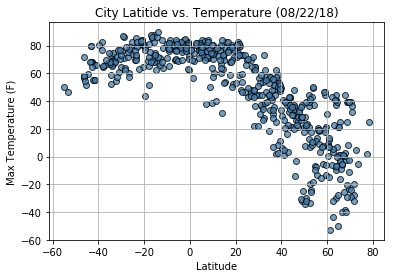

In [67]:
plt.scatter(x = city_df["Lat"], y = city_df["Max Temp"], marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'steelblue')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("City Latitide vs. Temperature (08/22/18)")

# Save Figure
plt.savefig(os.path.join("..", "images", "lat_vs_temp.png"), fitsize = [8,6])

#### Latitude vs. Humidity Plot

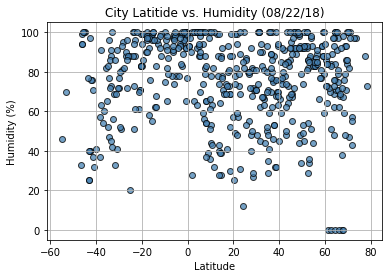

In [69]:
plt.scatter(x = city_df["Lat"], y = city_df["Humidity"], marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'steelblue')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitide vs. Humidity (08/22/18)")

# Save Figure
plt.savefig(os.path.join("..", "images", "lat_vs_humidity.png"), fitsize = [8,6])

#### Latitude vs. Cloudiness Plot

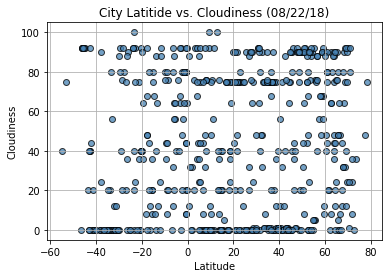

In [70]:
plt.scatter(x = city_df["Lat"], y = city_df["Cloudiness"], marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'steelblue')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("City Latitide vs. Cloudiness (08/22/18)")

# Save Figure
plt.savefig(os.path.join("..", "images", "lat_vs_cloudiness.png"), fitsize = [8,6])

#### Latitude vs. Wind Speed Plot

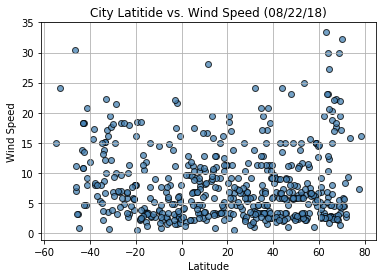

In [71]:
plt.scatter(x = city_df["Lat"], y = city_df["Wind Speed"], marker = 'o', alpha = 0.75, edgecolor = 'k', facecolor = 'steelblue')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("City Latitide vs. Wind Speed (08/22/18)")

# Save Figure
plt.savefig(os.path.join("..", "images", "lat_vs_wind.png"), fitsize = [8,6])

In [ ]:
# Some observations:
# 1) Temperature: the max temperature is highest for cities near the equator, and decrease with increasing latitudes; 
#    For high latitudes, the max temperature for the northern hemisphere is much lower than that of the southern hemisphere,
#    which is possibly due to:
#    a) there are no cities in Antarctica, therefore we do not have that part of data
#    b) near latitude -60, it is mostly ocean in the southern hemisphere, resulting in a maritime climate that's relatively mild
#    c) conversely, in the northern hemisphere near latitude 60, there is giant landmass (Siberia, etc), resulting in very low temp.
# 2) Humidity:
#    Extremely high humidities (from 80 to 100) are distributed throughout all latitudes, 
#    Dryness, however, are mostly seen near 
#    a) latitude 20 in the North, corresponding with the Sahara desert,
#    b) latitude -40 in the South, corresponding with the deserts in Australia and Southern Andes (Chile)
#    c) latitude 60 in the North, corresponding with the Taiga in Siberia
# 3) Cloudiness:
#    Not much correlation between cloudiness and latitude
# 4) Wind Speed:
#    Correlation is not obvious, and the majority of the cities have relatively slow wind. However
#    a) There seem to be some high-wind data points between lat 30 to lat 60, both north and south, 
#       which would correspond to the prevailing westerlies; but we would need more data to confirm
#    b) In the North there's some extremely strong wind points, which would correspond to the northern edge of Siberia
#       (on the coast of the Arctic circle), which is reasonable as wind speed can shoot up near the coast for lack of obstacles.